**An online car sales platform would like to improve its customer base and their experience by providing them an easy way  to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car if user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge regression model on it.**

Please use the below columns for the analysis purpose.

Price, Age_08_04, KM,  HP,   cc,  Doors , Gears, Quarterly_Tax, Weight

**Business Objective:- To predict the price of the car.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toyota = pd.read_csv(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\ToyotaCorolla (1).csv",encoding= 'unicode_escape')
toyota.info()
toyota.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


###### many columns were originally categorical but encoded - eg: airbag_1, etc which are represented by 0's & 1's
###### Fuel_Type & Colour, Model are categorical 
###### Id column is useless we will drop it

In [3]:
toyota.drop('Id', axis = 1, inplace = True)

toyota.isna().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

###### there are no missing values

In [4]:
# checking correlation for all columns till weight since after that they are encoded

toyota.loc[:,:'Weight'].corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,NaN,-0.160141,0.109363,0.302618


In [5]:
# cyclinder column is showing Nan
toyota.Cylinders.value_counts()
# it has 0 variance, so we will remove this too

toyota.drop('Cylinders', axis = 1, inplace = True)

<AxesSubplot:>

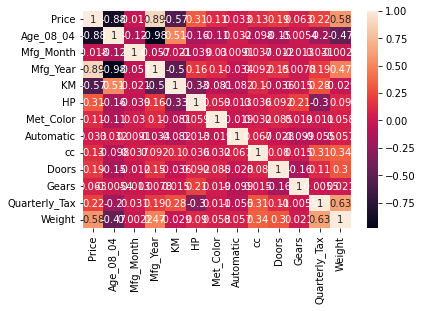

In [6]:
# checking correlations with Price column
toyota.loc[:,:'Weight'].corr()['Price']
sns.heatmap(toyota.loc[:,:'Weight'].corr(), annot = True)

###### from the heatmap we see that Age_08_04 and Mfg_Year are highly correlated in opposite direction, so they can cause multicollinearity problem
###### many variables have absolute correlation value below 0.3

###### instead of removing these now, we will let Lasso Regression remove the unimportant features

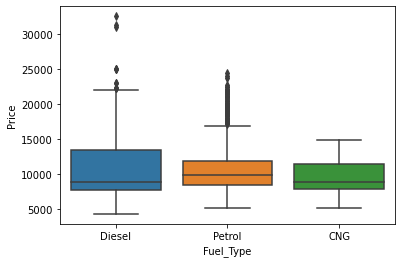

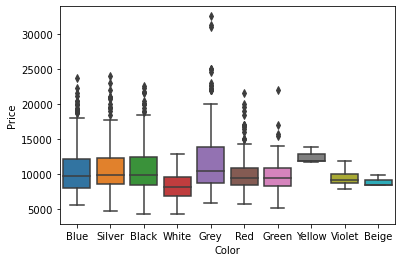

In [7]:
toyota.Model.nunique() # the Model column has 372 unique values - so we will drop it
toyota.drop('Model', axis = 1, inplace = True)
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = toyota);plt.show()
sns.boxplot(x = 'Color', y = 'Price', data = toyota);plt.show()

###### slight difference between avg price grouped by fuel tyepe
###### yellow has the highest median price, white the lowest median

###### we will convert these 2 columns to dummy variables

In [8]:
toyota_final = pd.get_dummies(data = toyota, columns = ['Fuel_Type','Color'], drop_first= True)

In [9]:
X = toyota_final.drop('Price', axis = 1) 
y = toyota_final['Price']

# splitting data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
# building base model first
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_pred)))
# RMSE of 1200 on test dataset
print('Test R-Squared',r2_score(y_test,test_pred))
# R square of 91% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_pred)))
# RMSE of 1063 on train dataset
print('Train R-Squared',r2_score(y_train,train_pred))
# R square of 90.8% on test dataset

Test RMSE 1200.2710818316493
Test R-Squared 0.9100249511509708
Train RMSE 1063.2333208401071
Train R-Squared 0.9087182820497789


In [11]:
#### Now we will use Elastic Net as it combines the penalties of ridge regression and lasso regreesion

from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

elastic_model.fit(X_train,y_train)

elastic_model.l1_ratio_
# elastic model selected the l1 ratio as 0.5 meaning 50% lasso & 50% ridge
# as some variables could have low predictive or overfitting so penalising is done

test_predictions_en = elastic_model.predict(X_test)
train_predictions_en = elastic_model.predict(X_train)


print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_predictions_en)))
# RMSE of 3127 on test dataset
print('Test R-Squared',r2_score(y_test,test_predictions_en))
# R square of 38%% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_predictions_en)))
# RMSE of 2869 on train dataset
print('Train R-Squared',r2_score(y_train,train_predictions_en))
# R square of 333.5% on test dataset

Test RMSE 3127.834402848425
Test R-Squared 0.3889863536966425
Train RMSE 2869.5858380988657
Train R-Squared 0.33508659505141736


###### drastic drop in R square using elastic net
###### very high penalizing was done

In [13]:
# let us first try to remove correlated features and then apply Elastic net

X_train = X_train.drop('Age_08_04', axis = 1)
X_test = X_test.drop('Age_08_04', axis = 1)

good_corr_col = toyota.loc[:,:'Weight'].corr()['Price'][abs(toyota.loc[:,:'Weight'].corr()['Price']) >0.2]
bad_cor_col = toyota.loc[:,:'Weight'].corr()['Price'][abs(toyota.loc[:,:'Weight'].corr()['Price']) < 0.2].index.tolist()

X_train = X_train.drop(bad_cor_col, axis = 1)
X_test = X_test.drop(bad_cor_col, axis = 1)


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(X_train,y_train)

enet_reg.best_params_
enet_reg.best_score_

test_predictions_en_3 = enet_reg.predict(X_test)
train_predictions_en_3 = enet_reg.predict(X_train)

print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_predictions_en_3)))
# RMSE of 1197.39 on test dataset
print('Test R-Squared',r2_score(y_test,test_predictions_en_3))
# R square of 91% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_predictions_en_3)))
# RMSE of 1076 on train dataset
print('Train R-Squared',r2_score(y_train,train_predictions_en_3))
# R square of 90.6% on test dataset

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534386942.9607805, tolerance: 1149766.6379490197
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487505766.2061028, tolerance: 1081920.732175708
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539397256.000267, tolerance: 1138690.1825647058
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

Test RMSE 1197.3974126580347
Test R-Squared 0.9104552689515237
Train RMSE 1076.234861961458
Train R-Squared 0.9064721912235745


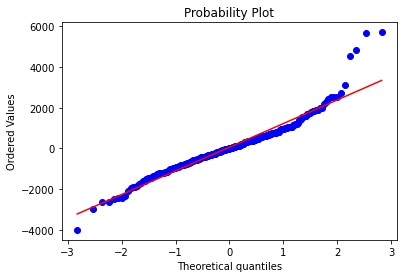

In [14]:
# model is right and very good fit

from scipy import stats
# Q-Q plot of errors
res = y_test - test_predictions_en_3
stats.probplot(res, dist = "norm", plot = plt)
plt.show()
# errors seem to be normally distributed expcept on the far right - model is ok